<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>



<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/GeoDataFrame_SpatialOperation/blob/main/GeoDF_Operations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Basic spatial operations in  Geo Dataframes

We will review some important operations for geodataframes. 

Let's remember the contents of the world map from last session:

<a class="anchor" id="0"></a>

In [2]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/dataSets/raw/refs/heads/main/WORLD/worldMaps.gpkg"

import geopandas as gpd
gpd.list_layers(linkWorldMap)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


Let's open all the layers (this takes a minute):

In [3]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')



Now, let's see some important spatial operations:

1. [Subsetting](#1)
2. [Combining GeoDF rows](#3)
3. [The convex hull](#4)
4. [Spatial Overlays](#5)
5. [Checking Validity](#6)




<a class="anchor" id="1"></a>

# Subsetting

## Filtering

You can keep some elements by subsetting by *filtering*, as we used to do in common pandas data frames.

In [4]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [5]:
# as DF
countries.iloc[50:,]

,COUNTRY,geometry
50,Central African Republic,"MULTIPOLYGON (((20.4533 4.52379, 20.45798 4.61..."
51,Cuba,"MULTIPOLYGON (((-76.94608 21.45221, -76.8839 2..."
52,Cape Verde,"MULTIPOLYGON (((-25.28139 16.91333, -25.29861 ..."
53,Cook Islands (New Zealand),"MULTIPOLYGON (((-165.84167 -10.89084, -165.848..."
54,Cyprus,"MULTIPOLYGON (((33.27229 34.70955, 33.21722 34..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


In [6]:
# as DF
countries.loc[50:,'geometry']

50     MULTIPOLYGON (((20.4533 4.52379, 20.45798 4.61...
51     MULTIPOLYGON (((-76.94608 21.45221, -76.8839 2...
52     MULTIPOLYGON (((-25.28139 16.91333, -25.29861 ...
53     MULTIPOLYGON (((-165.84167 -10.89084, -165.848...
54     MULTIPOLYGON (((33.27229 34.70955, 33.21722 34...
                             ...                        
247    MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9...
248    MULTIPOLYGON (((123.21846 -10.80917, 123.19832...
249    MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...
250    MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ...
251    MULTIPOLYGON (((-68.19736 12.22264, -68.19292 ...
Name: geometry, Length: 202, dtype: geometry

But as a GeDF, you can also filter using a coordinate point via __cx__. Let me get the bounding box of the map:

In [7]:
countries.total_bounds

array([-180.        ,  -90.        ,  180.        ,   83.62359619])

As you are getting __[minx, miny, maxx, maxy]__ let me select a valid coordinate, i.e. (0,0)

In [8]:
countries.cx[:0,:0]

,COUNTRY,geometry
9,American Samoa (US),"MULTIPOLYGON (((-170.7439 -14.37556, -170.7494..."
10,Argentina,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
14,Antarctica,"MULTIPOLYGON (((-45.14528 -60.76611, -45.15639..."
24,Bolivia,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945..."
29,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
42,Chile,"MULTIPOLYGON (((-73.61806 -51.6339, -73.60494 ..."
47,Colombia,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."
53,Cook Islands (New Zealand),"MULTIPOLYGON (((-165.84167 -10.89084, -165.848..."
58,Jarvis Island (US),"MULTIPOLYGON (((-160.02115 -0.39806, -160.0281..."
60,Ecuador,"MULTIPOLYGON (((-78.70903 -4.58479, -78.72348 ..."


<Axes: >

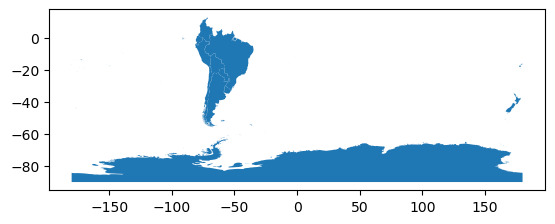

In [9]:
#then
countries.cx[:0,:0].plot()

Notice __cx__ would be cleaner if spatial element is a point.

## Clipping

Let me keep one country:

In [10]:
brazil=countries[countries.COUNTRY=='Brazil']
#see
brazil

,COUNTRY,geometry
29,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."


Pay attention to this GDF:

In [11]:
cities

,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.571)
4,Perm',Russia,N,POINT (56.23246 58.00024)
...,...,...,...,...
605,Singapore,Singapore,N,POINT (103.82688 1.34654)
606,Gaza,Palestine,N,POINT (34.41939 31.46288)
607,Juba,South Sudan,Y,POINT (31.76671 4.57511)
608,Dili,East Timor,Y,POINT (125.67275 -8.56601)


The GDF has a column 'COUNTRY' too.

Now, check the rivers GDF:

In [12]:
rivers

,NAME,SYSTEM,geometry
0,Aldan,Lena,"MULTILINESTRING ((124.00678 56.47258, 123.2595..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.2773 -3.60706, -60.68466..."
2,Amu Darya,None,"MULTILINESTRING ((73.98818 37.49952, 73.52595 ..."
3,Amur,None,"MULTILINESTRING ((122.63956 49.9973, 120.47874..."
4,Angara,None,"MULTILINESTRING ((105.07841 51.93053, 103.9295..."
...,...,...,...
93,Yangtze,None,"MULTILINESTRING ((119.82609 32.24864, 118.9707..."
94,Yenisey,None,"MULTILINESTRING ((98.94706 52.57675, 98.12095 ..."
95,Yukon,None,"MULTILINESTRING ((-130.89319 59.2448, -131.065..."
96,Zambezi,None,"MULTILINESTRING ((35.52866 -17.66773, 36.28055..."


As you see, this GDF has no Country. But since it has geometry, you can keep the rivers, or their sections, that serve a country:

In [13]:
riversBrazil_clipped = gpd.clip(gdf=rivers,
                               mask=brazil)

Then, you can plot the clipped version:

<Axes: >

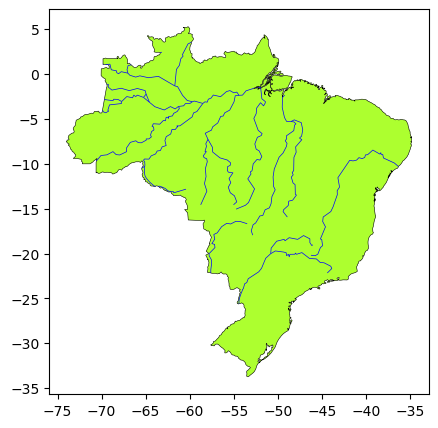

In [14]:
base = brazil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
riversBrazil_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

The geometry types are not modified:

In [15]:
set(brazil.geom_type), set(riversBrazil_clipped.geom_type)

({'MultiPolygon'}, {'LineString', 'MultiLineString'})

[TOC](#0)

_____________


<a class="anchor" id="3"></a>

# Combining GeoDF rows

Let me bring the projected data from Brazil.

In [16]:
LinkBrazil="https://github.com/CienciaDeDatosEspacial/dataSets/raw/refs/heads/main/BRAZIL/brazil_5880.gpkg"
## we have
gpd.list_layers(LinkBrazil)

,name,geometry_type
0,country,MultiPolygon
1,cities,Point
2,airports,Point
3,states,MultiPolygon
4,municipalities,MultiPolygon


Let me open municipalities:

In [ ]:
brazil_municipalities=gpd.read_file(LinkBrazil,layer='municipalities')
brazil_municipalities.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [ ]:
#see
brazil_municipalities.head()

In [ ]:
## we have
len(brazil_municipalities.ADM2_PT)

In [ ]:
# higher level count
len(set(brazil_municipalities.ADM1_PT))

Then, this is Minas Gerais:

In [ ]:
brazil_municipalities[brazil_municipalities.ADM1_PT=='Minas Gerais'].plot()

Let's see the options to combine:

## Unary UNION

We can combine all these polygons into one:

In [ ]:
pip show shapely

In [ ]:
brazil_municipalities[brazil_municipalities.ADM1_PT=='Minas Gerais'].union_all()

Let's save that result:

In [ ]:
MinasGerais_union=brazil_municipalities[brazil_municipalities.ADM1_PT=='Minas Gerais'].union_all()

In [ ]:
# what do we have?
type(MinasGerais_union)

You can turn that shapely object into a GeoDF like this:

In [ ]:
gpd.GeoDataFrame(index=[0],data={'ADM':'Minas Gerais'},
                 crs=brazil_municipalities.crs,
                 geometry=[MinasGerais_union])

<a class="anchor" id="21"></a>

## Dissolve

### a. Dissolve as Union
Using  **dissolve** is an alternative to _UNION_:

In [ ]:
brazil_municipalities[brazil_municipalities.ADM1_PT=='Minas Gerais'].dissolve().plot()

Let me save the result, and see the type :

In [ ]:
MinasGerais_dissolve=brazil_municipalities[brazil_municipalities.ADM1_PT=='Minas Gerais'].dissolve()

# we got?
type(MinasGerais_dissolve)

You got a GEOdf this time:

In [ ]:
## see
MinasGerais_dissolve

In [ ]:
# keeping what is relevant
MinasGerais_dissolve.drop(columns=['ADM2_PT','ADM2_PCODE','ET_ID'],inplace=True)

# then
MinasGerais_dissolve

### b. Dissolve for groups

Using _dissolve()_ with no arguments returns the union of the polygons, BUT also you get a GEOdf.
However, if you have a column that represents a grouping (as we do), you can dissolve by that column:

In [ ]:
# dissolving
brazil_municipalities.dissolve(by='ADM1_PT').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

Again, let me save this result:

In [ ]:
Brazil_adm1_diss=brazil_municipalities.dissolve(by='ADM1_PT')

We know we have a GeoDF; let's see contents:

In [ ]:
Brazil_adm1_diss

Again, we can drop columns that do not bring important information:

In [ ]:
Brazil_adm1_diss.drop(columns=['ADM2_PT','ADM2_PCODE','ET_ID'],inplace=True)
Brazil_adm1_diss.reset_index(inplace=True)
Brazil_adm1_diss.info()

### c. Dissolve and aggregate

In pandas, you have can aggregate data using some statistics. Dissolve can be used in the same way. Let me use the _indicators_ layer:

In [ ]:
indicators.head()

We have numerical columns, and a grouping column named _region_. Let's get some averages by region, while combining the polygons:

In [ ]:
indicators.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["mean"],
         "co2": ["mean"],
         "ForestRev_gdp": ["mean"]
     },as_index=False,
 )

Let me save and plot:

In [ ]:
indicatorsByRegion=indicators.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["mean"],
         "co2": ["mean"],
         "ForestRev_gdp": ["mean"]
     },as_index=False,
 )


indicatorsByRegion.plot(column = 'region')

Without renaming, you can request a choropleth:

In [ ]:
indicatorsByRegion.plot(column =('fragility', 'mean'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Fragility",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

## Exercise 2


<div class="alert-success">

1. Create some subset of polygons with your country data at the municipal (or similar level). Use Unary UNION with those  polygons, and create a geoDF with the result.
2. Dissolve your municipalities by another higher level administrative level. Plot the result.
3. If possible, color some areas of your country by aggregating; if not, plot the "median" values in the _indicators_ map.
    
</div>

[TOC](#0)
_____________


<a class="anchor" id="4"></a>

# The convex hull

Some time you may have the need to create a polygon that serves as an envelope to a set of points.

For this example, let me compute the centroid coordinates:

In [ ]:
brazil_5641=gpd.read_file(LinkBrazil,layer='country')
brazil_5641.centroid

In [ ]:
# then
brazil_5641.centroid.x.values[0],brazil_5641.centroid.y.values[0]

Let me open the airports:

In [ ]:
airports_5641=gpd.read_file(LinkBrazil,layer='airports')
airports_5641.head()

Now, let me plot some airports, using the centroid:

In [ ]:
# coordinates
centroidX,centroidY=brazil_5641.centroid.x.values[0],brazil_5641.centroid.y.values[0]

# subsets of medium airports
Brazil_AirTopLeft=airports_5641[airports_5641.kind=='medium_airport'].cx[:centroidX,centroidY:]
Brazil_AirTopRight=airports_5641[airports_5641.kind=='medium_airport'].cx[centroidX:,centroidY:]
Brazil_AirBottomLeft=airports_5641[airports_5641.kind=='medium_airport'].cx[:centroidX,:centroidY]
Brazil_AirBottomRight=airports_5641[airports_5641.kind=='medium_airport'].cx[centroidX:,:centroidY]

Let me plot the subsets:

In [ ]:
base=Brazil_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Brazil_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
Brazil_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Brazil_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

Notice we have simple points in each subset:

In [ ]:
Brazil_AirBottomLeft

In this situation, you can NOT make a _convex hull_:

In [ ]:
Brazil_AirBottomLeft.convex_hull.plot()

You first need to **dissolve**, and then you create a hull, an envelope of  convex angles:

In [ ]:
Brazil_AirBottomLeft.dissolve().convex_hull.plot()

As we saw, the convex hull is a polygon:

In [ ]:
Brazil_AirBottomLeft.dissolve().convex_hull

What if we the polygons had not been previously combined?

In [ ]:
brazil_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

That is, you get a convex hull for each geometry.

We can also use _union_ before creating a convex hull:

In [ ]:
# just the union
large_airport=airports_5641[airports_5641.kind=='large_airport']
large_airport.union_all()

In [ ]:
# hull of the union
large_airport.union_all().convex_hull

Let's turn the GS into a GDF:

In [ ]:
LargeAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=large_airport.crs,
                                    geometry=[large_airport.union_all().convex_hull])
LargeAirport_hull['name']='large airports hull' # optional

# then

LargeAirport_hull

Let's use the GDF in plotting:

In [ ]:
base=brazil_5641.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

### Exercise 3

<div class="alert-success">

1. Select some points from your maps.
    
2. Create the convex hull for those points.
    
3. Turn the hull into a GDF.
    
4. Plot the hull on top of the country.
    
</div>

[TOC](#0)
_____________

<a class="anchor" id="5"></a>
# Spatial Overlay

We might need to create or find some geometries from the geometries we already have. Using a set theory approach, we will se the use of _intersection_, _union_, _difference_, and _symmetric difference_.

Let me create this GeoDFs:

In [ ]:
# the north
MunisN_brazil=brazil_municipalities.cx[:,centroidY:]
# the south
MunisS_brazil=brazil_municipalities.cx[:,:centroidY]
# the west
MunisW_brazil=brazil_municipalities.cx[:centroidX,:]
# the east
MunisE_brazil=brazil_municipalities.cx[centroidX:,:]

Let me plot:

In [ ]:
base=MunisN_brazil.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisS_brazil.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

In [ ]:
base=MunisE_brazil.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisW_brazil.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

## Intersection

We keep what is common between GeoDFs:

In [ ]:
munisNS_brazil=MunisN_brazil.overlay(MunisS_brazil, how="intersection",keep_geom_type=True)
munisNS_brazil.plot()

In [ ]:
# keeping the overlay
munisWE_brazil=MunisW_brazil.overlay(MunisE_brazil, how="intersection",keep_geom_type=True)
munisWE_brazil.plot(edgecolor='white',linewidth=0.1)

## Union

Let me unite any polygons that touche each other. First, take a look at each one:

In [ ]:
munisNS_brazil.info()

In [ ]:
munisWE_brazil.info()

Let me subset and show you:

In [ ]:
keep=['ADM0_EN_1','ADM1_PT_1','ADM2_PT_1','geometry']
munisNS_brazil=munisNS_brazil.loc[:,keep]
munisWE_brazil=munisWE_brazil.loc[:,keep]

In [ ]:
# now
munisNS_brazil.overlay(munisWE_brazil,how="union",keep_geom_type=True)

As you see, geometries are fine, but not attributes. It is strictly NOT appending the GeoDFs:

In [ ]:
# appending
import pandas as pd

pd.concat([munisNS_brazil,munisWE_brazil],ignore_index=True)

This are different operations. UNION will combine any geometries that have overlaping portions in common.

In [ ]:
munisNS_brazil.overlay(munisWE_brazil, how="union",keep_geom_type=True).dissolve().plot()

Let me create an object to save the previous result:

In [ ]:
muniMidBrazil=munisNS_brazil.overlay(munisWE_brazil, how="union",keep_geom_type=True).dissolve()
muniMidBrazil

In [ ]:
# some cleaning

muniMidBrazil['zone']='middles'
muniMidBrazil=muniMidBrazil.loc[:,['ADM0_EN_1_1','zone','geometry']]
muniMidBrazil

## Difference

Here, you keep what belongs to the GeoDF to left that is not in the GeoDF to the right:

In [ ]:
# with the municipalities
brazil_municipalities.overlay(muniMidBrazil, how='difference').plot()

## Symmetric Difference

This is the opposite to *intersection*, you keep what is not in the intersection:

In [ ]:
MunisN_brazil.overlay(MunisS_brazil, how="symmetric_difference",keep_geom_type=True).plot()

In [ ]:
MunisW_brazil.overlay(muniMidBrazil, how="symmetric_difference",keep_geom_type=False).plot()

# Exercise 4

<div class="alert-success">

Apply two spatial overlays to your maps. If possible. If not, try the codes below.

        
</div>

[TOC](#0)
_____________

<a class="anchor" id="6"></a>

# Validity of Geometry

Geometries are created in a way that some issues may appear, especially in (multi) polygons.
Let's check if our recent maps on states and municipalities are valid:

In [ ]:
# non valid
MunisS_brazil[~MunisS_brazil.is_valid]

In [ ]:
# see the invalid:
MunisS_brazil[~MunisS_brazil.is_valid].plot()

It is difficult to see what is wrong. Let's get some information:

In [ ]:
# what is wrong?

from shapely.validation import explain_validity, make_valid

explain_validity(MunisS_brazil[~MunisS_brazil.is_valid].geometry)

In [ ]:
# varieties?
MunisS_brazil['validity']=[x.split('[')[0] for x in MunisS_brazil.geometry.apply(lambda x: explain_validity(x))]
MunisS_brazil['validity'].value_counts()

In [ ]:
# solving the issue:
MunisS_brazil.drop(columns=['validity'],inplace=True)

MunisS_brazil_valid=MunisS_brazil.copy()

MunisS_brazil_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in MunisS_brazil_valid['geometry'] ]
#any invalid?
MunisS_brazil_valid[~MunisS_brazil_valid.is_valid]

The _solution_ we got may help for some advanced techniques, but may also give us some extra trouble. Notice that once geopandas solved the problem, you  have created **collections**:

In [ ]:
pd.Series([type(x) for x in MunisS_brazil_valid.geometry]).value_counts()

Let's do the same for the other GDFs:

In [ ]:
# solving the issue:

MunisN_brazil_valid=MunisN_brazil.copy()
MunisE_brazil_valid=MunisE_brazil.copy()
MunisW_brazil_valid=MunisW_brazil.copy()

MunisN_brazil_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in MunisN_brazil_valid['geometry'] ]
MunisE_brazil_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in MunisE_brazil_valid['geometry'] ]
MunisW_brazil_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in MunisW_brazil_valid['geometry'] ]


In [ ]:
MunisN_brazil_valid.overlay(MunisS_brazil_valid, how="symmetric_difference",keep_geom_type=True).plot()

In [ ]:
MunisN_brazil_cleaned = MunisN_brazil_valid.copy()
MunisS_brazil_cleaned = MunisS_brazil_valid.copy()
MunisE_brazil_cleaned = MunisE_brazil_valid.copy()
MunisW_brazil_cleaned = MunisW_brazil_valid.copy()

# Apply buffer(0) to potentially fix remaining issues
MunisN_brazil_cleaned['geometry'] = MunisN_brazil_cleaned.geometry.buffer(0)
MunisS_brazil_cleaned['geometry'] = MunisS_brazil_cleaned.geometry.buffer(0)
MunisE_brazil_cleaned['geometry'] = MunisE_brazil_cleaned.geometry.buffer(0)
MunisW_brazil_cleaned['geometry'] = MunisW_brazil_cleaned.geometry.buffer(0)

In [ ]:
# Try the overlay with the cleaned dataframes
MunisN_brazil_cleaned.overlay(MunisS_brazil_cleaned, how="symmetric_difference", keep_geom_type=True).plot()

In [ ]:
MunisE_brazil_cleaned.overlay(MunisW_brazil_cleaned, how="symmetric_difference", keep_geom_type=True).plot()